In [469]:
# importing the standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

In [470]:
# Reading the data as pandas dataframe
loan = pd.read_csv("loan.csv")

/tmp/ipykernel_798/3003639324.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv")


In [471]:
# Removing columns which contains all null values
loan = loan.dropna(axis=1, how='all')
# Removing rows with contains null values
loan = loan.dropna(axis=0, how='all')

In [472]:
# Data cleaning
loan['term'] = loan['term'].apply(lambda x: int(x.replace('months', '').strip()))
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))
loan['verification_status'].replace('Source Verified', 'Verified', inplace = True)


In [473]:
##Data cleaning and forming
emp_length_dict: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}
# Use the map function to replace values in the 'emp_length' column
loan['emp_length'] = loan['emp_length'].map(emp_length_dict)

#Remove Id column
loan.drop('id', axis=1, inplace=True)

## Filling records with emp_length nan with value as -1
loan.emp_length.fillna(-1, inplace=True)


# Based on the box plot on annual_inc data is skewed, so considering records which are below p95.
loan = loan[loan['annual_inc'] < loan['annual_inc'].quantile(0.95)] 
loan = loan[loan['loan_status'] != 'Current']

loan.issue_d=pd.to_datetime(loan.issue_d,format='%b-%y')
loan['issue_year']=pd.to_datetime(loan.issue_d,format='%b-%y').dt.year
loan['issue_month']=pd.to_datetime(loan.issue_d,format='%b-%y').dt.month


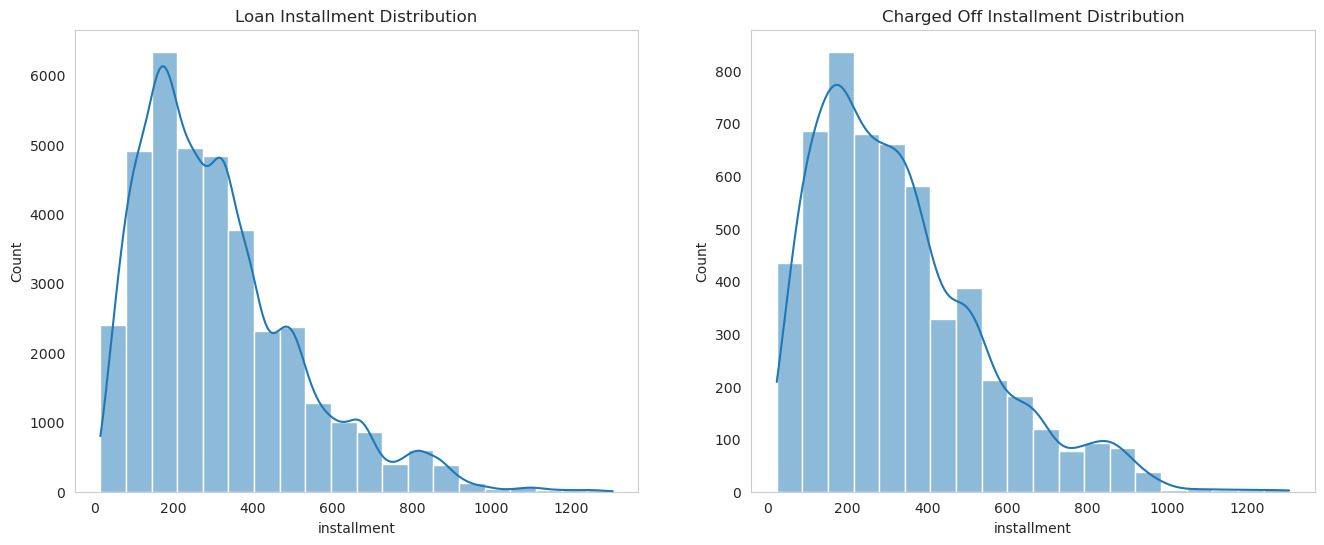

In [474]:
## univariate Analysis
charged_off_df = loan[loan['loan_status'] == 'Charged Off']

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(loan["installment"], bins=20, kde=True, ax=ax[0])
sns.histplot(charged_off_df["installment"], bins=20, kde=True, ax=ax[1])

ax[0].set_title('Loan Installment Distribution')
ax[1].set_title('Charged Off Installment Distribution')
fig.show()

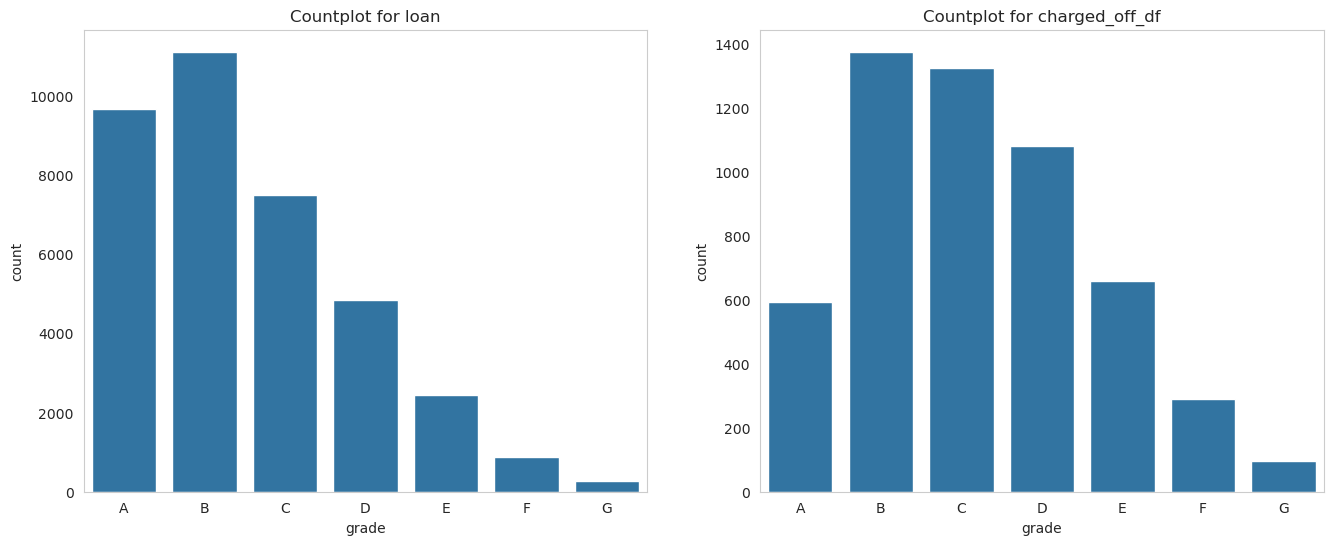

In [475]:
###Univariate Analysis
# sorted_order = sorted(loan['grade'].unique())
# sns.countplot(x="grade", data=loan, label='Grade', order=sorted_order)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sorted_order = sorted(loan['grade'].unique())
sns.countplot(x='grade', data=loan, ax=ax[0], order = sorted_order)
ax[0].set_title('Countplot for loan')

# Plot 2: Countplot for df2
sorted_order = sorted(charged_off_df['grade'].unique())
sns.countplot(x='grade', data=charged_off_df, ax=ax[1], order = sorted_order)
ax[1].set_title('Countplot for charged_off_df')

plt.show()


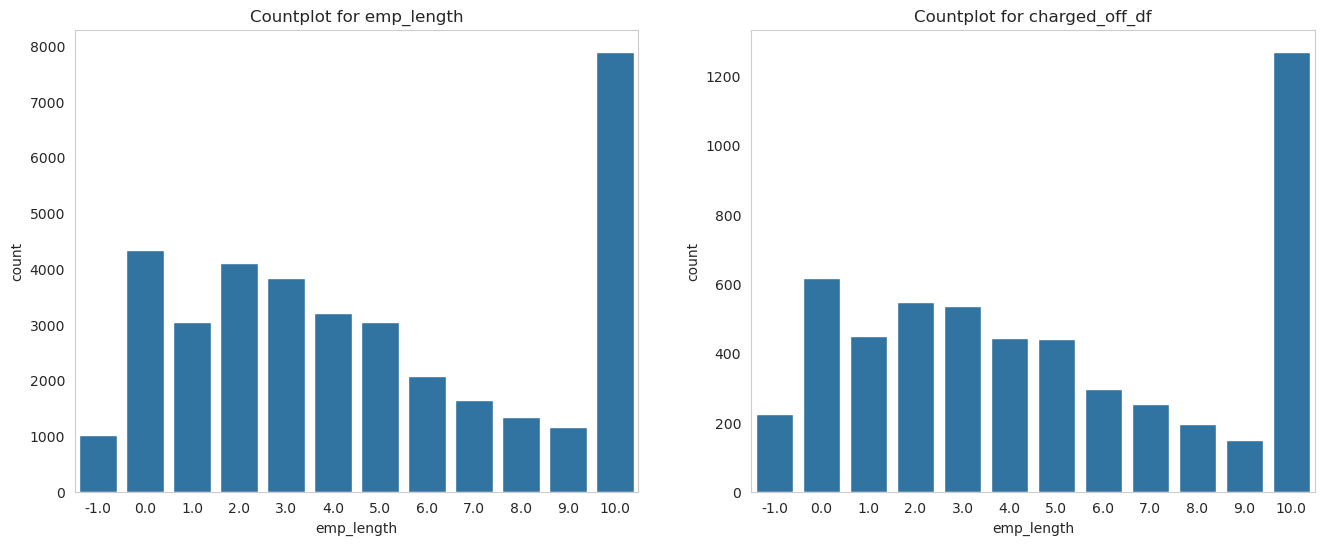

In [476]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='emp_length', data=loan, ax=ax[0])
ax[0].set_title('Countplot for emp_length')

# Plot 2: Countplot for df2
sns.countplot(x='emp_length', data=charged_off_df, ax=ax[1])
ax[1].set_title('Countplot for charged_off_df')

plt.show()


#sns.countplot(x='emp_length', data = loan, label='Employee Length')
## Majority of employees who took loan are above 10+ years

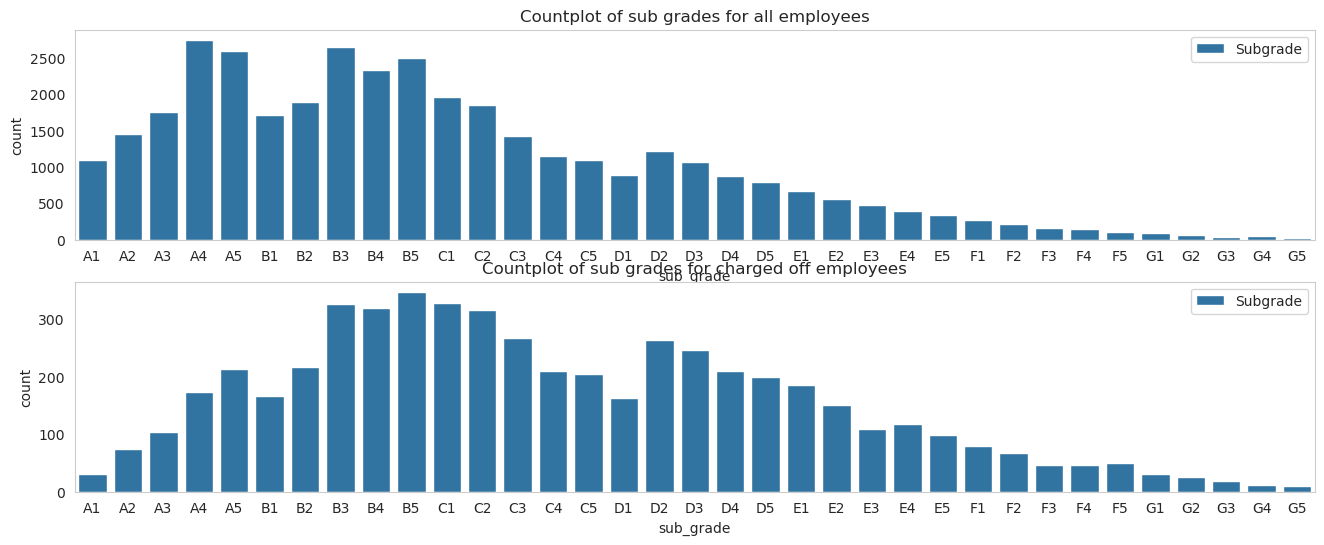

<Figure size 1500x600 with 0 Axes>

In [477]:
fig, ax = plt.subplots(2, 1, figsize=(16, 6))

plt.figure(figsize=(15, 6))
sorted_order = sorted(loan['sub_grade'].unique())
sns.countplot(x='sub_grade', data = loan, label='Subgrade', order=sorted_order, ax = ax[0])
ax[0].set_title('Countplot of sub grades for all employees')

sorted_order = sorted(charged_off_df['sub_grade'].unique())
sns.countplot(x='sub_grade', data = charged_off_df, label='Subgrade', order=sorted_order, ax = ax[1])
ax[1].set_title('Countplot of sub grades for charged off employees')
plt.show()
## Majority of loan applicants are between sub-grade A4 to C2

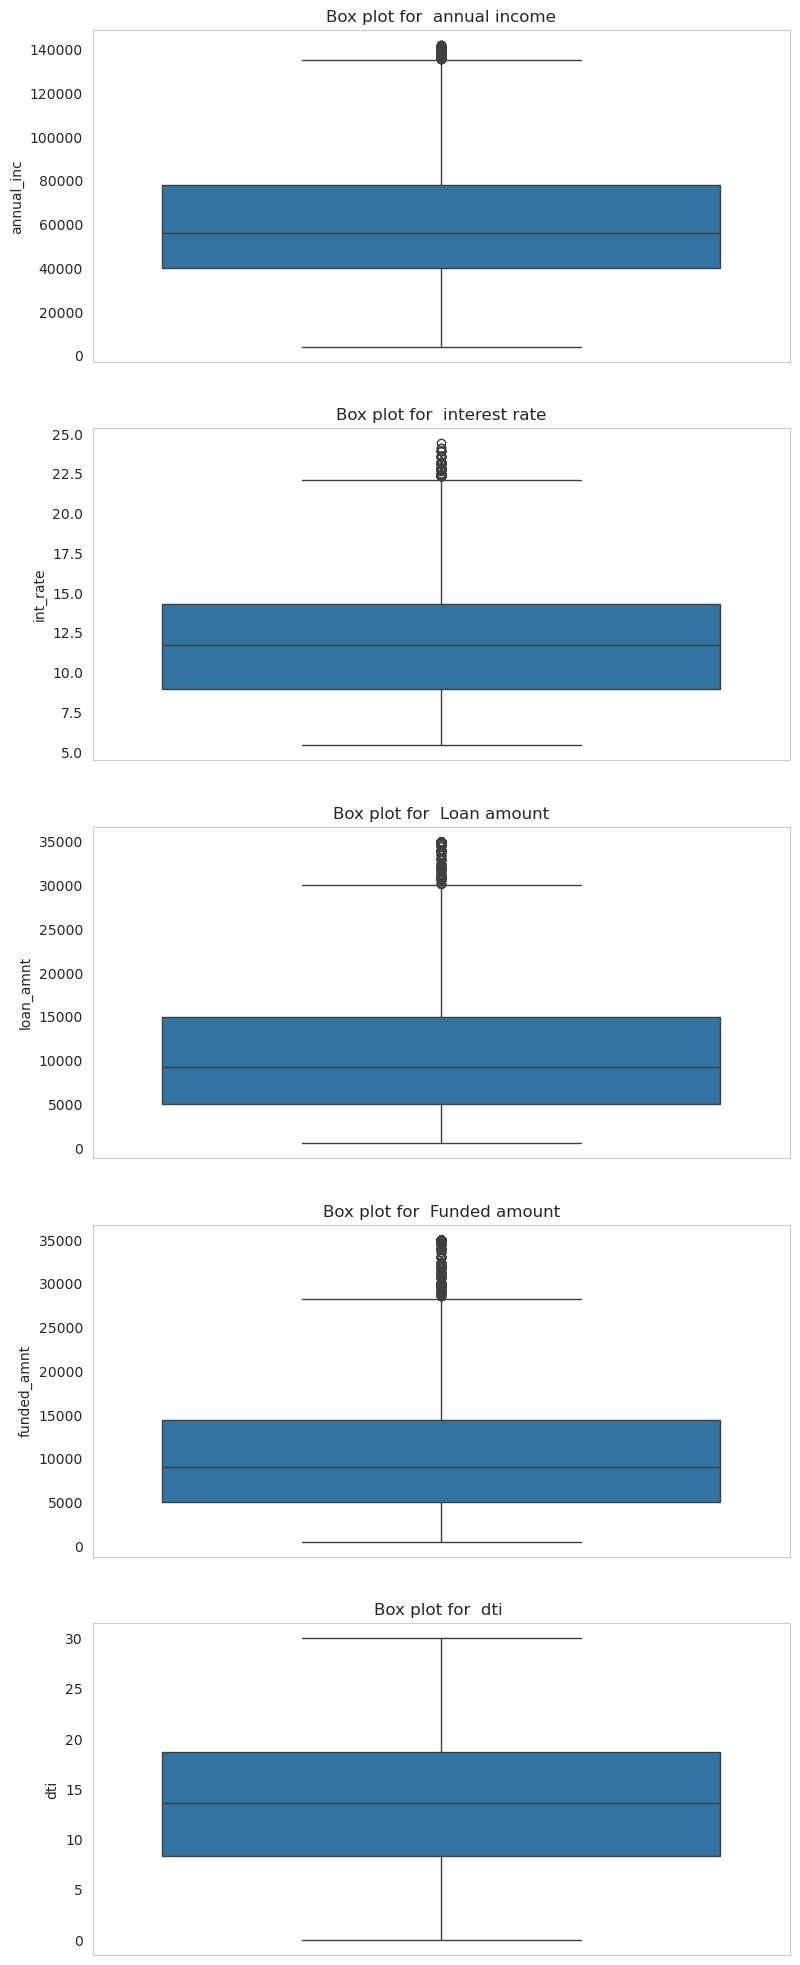

In [485]:
## For Quantitative variables
columns = ['annual_inc', 'int_rate', 'loan_amnt', 'funded_amnt', 'dti']
fig, ax = plt.subplots(5, 1, figsize=(9, 25))


#sns.boxplot(loan["annual_inc"], ax = ax[0])
sns.boxplot(y='annual_inc', data=loan, ax = ax[0], orient='v')
ax[0].set_title('Box plot for  annual income')

sns.boxplot(y='int_rate', data=loan, ax = ax[1], orient='v')
ax[1].set_title('Box plot for  interest rate')

sns.boxplot(y='loan_amnt', data=loan, ax = ax[2], orient='v')
ax[2].set_title('Box plot for  Loan amount')

sns.boxplot(y='funded_amnt', data=loan, ax = ax[3], orient='v')
ax[3].set_title('Box plot for  Funded amount')

sns.boxplot(y='dti', data=loan, ax = ax[4], orient='v')
ax[4].set_title('Box plot for  dti ')

plt.show()



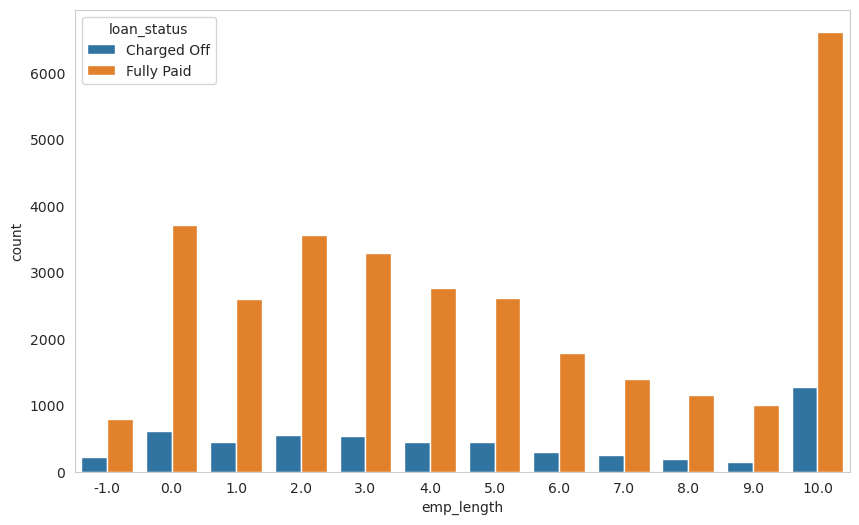

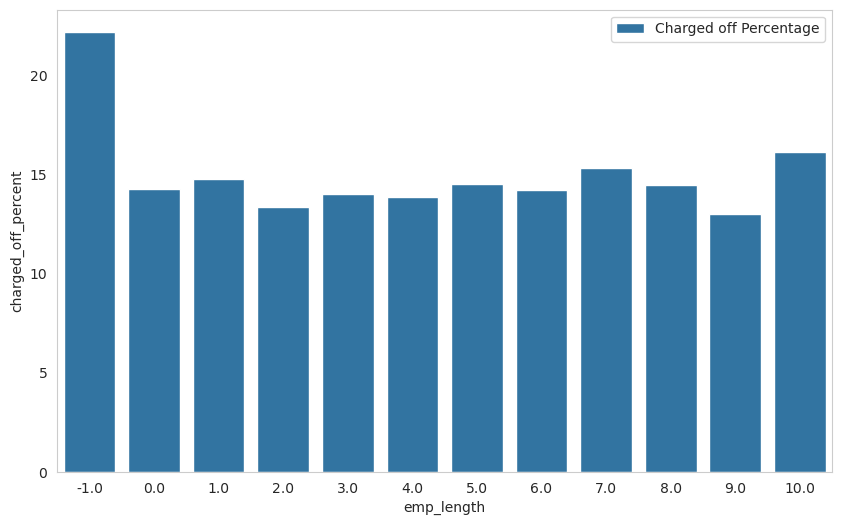

In [382]:
## Bi-variate analysis on emp length and loan status
## Relation between emp length and loan status
df1 = loan[loan['loan_status'] == 'Charged Off'].groupby('emp_length', dropna=False)['loan_status'].count().reset_index(name='charged off')
df2 = loan.groupby('emp_length', dropna=False)['loan_status'].count().reset_index(name='total employees')

df3 = loan[loan['loan_status'] == 'Fully Paid'].groupby('emp_length', dropna=False)['loan_status'].count().reset_index(name='Fully Paid')
comparison_df = pd.merge(df1, df2, on='emp_length')
result_df = pd.merge(comparison_df, df3, on='emp_length')


result_df['charged_off_percent'] = (result_df['charged off'] / result_df['total employees']) * 100
result_df['fully_paid_percent'] = (result_df['Fully Paid'] / result_df['total employees']) * 100

plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', hue='loan_status', data=loan)
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=result_df['emp_length'], y=result_df['charged_off_percent'], label='Charged off Percentage')
plt.show()

## Based on the graph, we can easily understad that if emp_length not available( we know that if he/she is not an employee to any firm or doing self business)
## the charge off rate is high

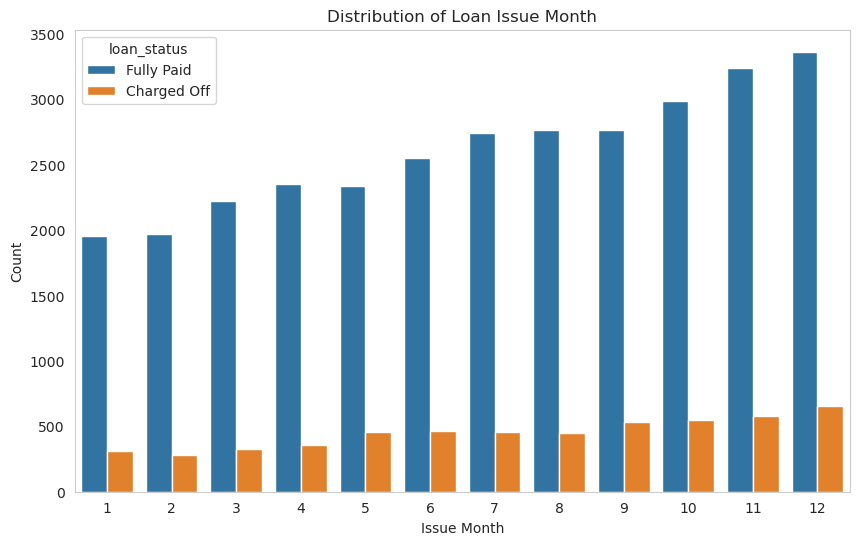

In [486]:

plt.figure(figsize=(10,6))
sns.countplot(x='issue_month', hue='loan_status', data=loan)
plt.xlabel('Issue Month')
plt.ylabel('Count')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()


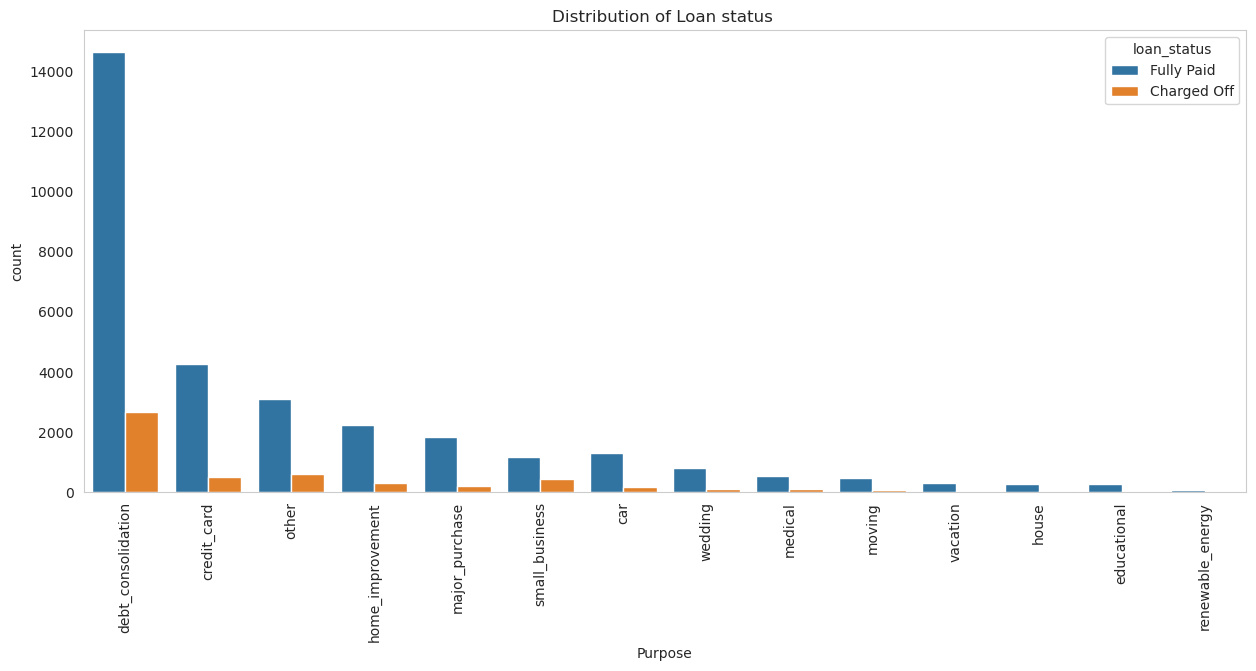

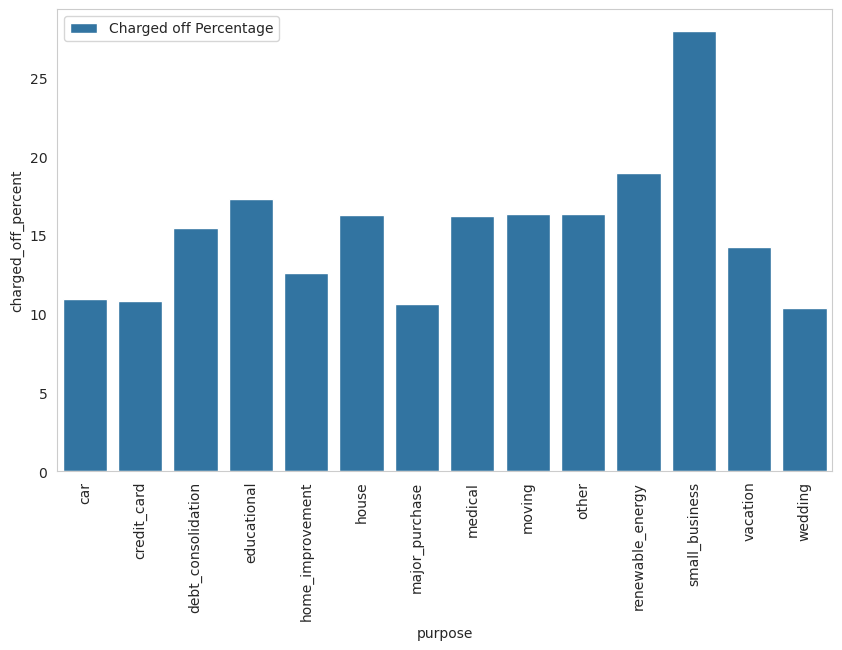

In [438]:
plt.figure(figsize=(15, 6))

purpose_order = (
    loan.groupby('purpose')['loan_status']
    .count()
    .sort_values(ascending=False)
    .index
)

ax = sns.countplot(x='purpose', hue='loan_status', data=loan, order=purpose_order)

plt.xlabel('Purpose')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Distribution of Loan status ',fontsize=12)
plt.show()

df1 = loan[loan['loan_status'] == 'Charged Off'].groupby('purpose', dropna=False)['loan_status'].count().reset_index(name='Charged Off')
df2 = loan.groupby('purpose', dropna=False)['loan_status'].count().reset_index(name='total count')
df3 = loan[loan['loan_status'] == 'Fully Paid'].groupby('purpose', dropna=False)['loan_status'].count().reset_index(name='Fully Paid')

result_temp = pd.merge(df1, df2, on='purpose')
result_df = pd.merge(result_temp, df3, on='purpose')


result_df['charged_off_percent'] = (result_df['Charged Off'] / result_df['total count']) * 100
result_df['fully_paid_percent'] = (result_df['Fully Paid'] / result_df['total count']) * 100


plt.figure(figsize=(10, 6))
sns.barplot(x=result_df['purpose'], y=result_df['charged_off_percent'], label='Charged off Percentage')
plt.xticks(rotation=90)
plt.show()


In [463]:
bins = [0, 5000, 10000, 15000, float('inf')]
labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan['loan_bucket'] = pd.cut(loan['loan_amnt'], bins=bins, labels=labels, right=False)


# Define the bin edges (ranges)
bins = [0, 20000, 30000, 40000, 50000, 60000, 70000, 80000, float('inf')]  # Bin edges
labels = ['0 - 20k', '20k - 30k', '30k - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan['annual_inc_bucket'] = pd.cut(loan['annual_inc'], bins=bins, labels=labels, right=False)

bins = [0, 5, 9, 13, 17, 21, float('inf')]
labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%- above%']
loan['int_rate_bucket'] = pd.cut(loan['int_rate'], bins=bins, labels=labels, right=False)

bins = [0, 4, 8, 12, 16, 20, float('inf')]
labels = ['dti < 4', 'dti 4-8', 'dti 8-12', 'dti 12-16', 'dti 16-20', 'dti 20 above']
loan['dti_bucket'] = pd.cut(loan['dti'], bins=bins, labels=labels, right=False)



/tmp/ipykernel_798/2368709588.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan.groupby('loan_bucket')['loan_status']


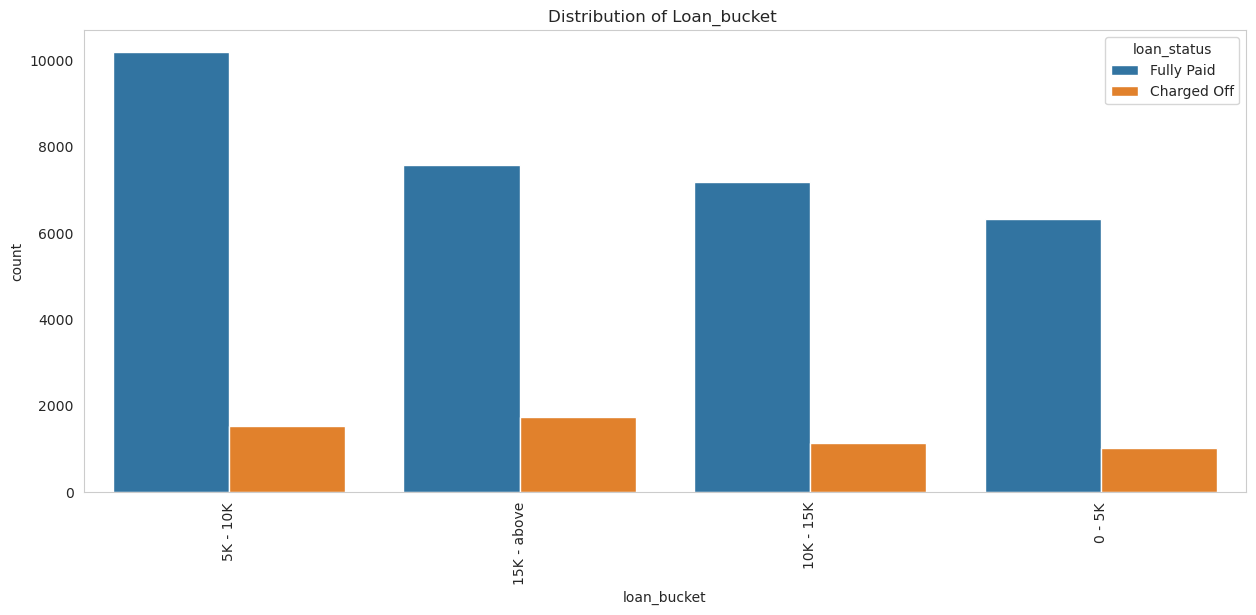

/tmp/ipykernel_798/2368709588.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = loan[loan['loan_status'] == 'Charged Off'].groupby('loan_bucket', dropna=False)['loan_status'].count().reset_index(name='Charged Off')
/tmp/ipykernel_798/2368709588.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = loan.groupby('loan_bucket', dropna=False)['loan_status'].count().reset_index(name='total count')
/tmp/ipykernel_798/2368709588.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or o

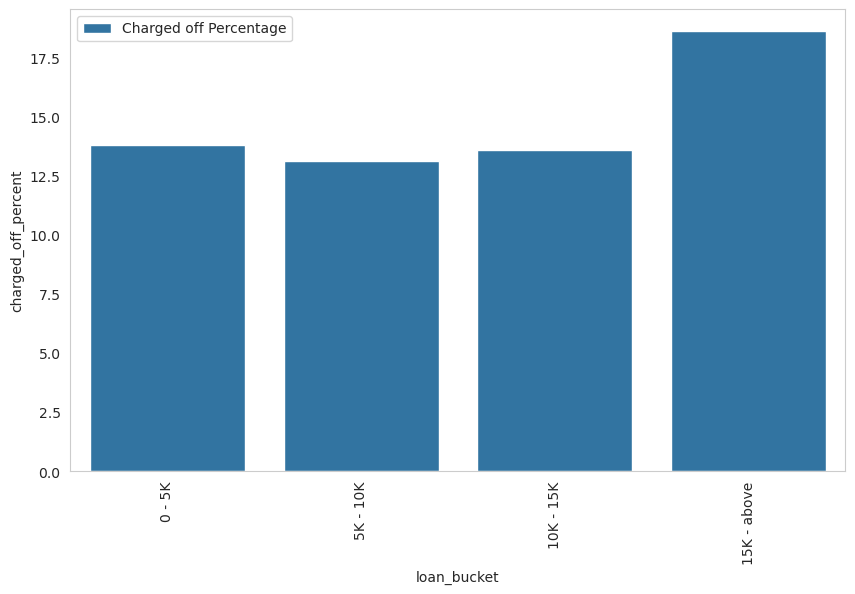

In [457]:
plt.figure(figsize=(15, 6))

purpose_order = (
    loan.groupby('loan_bucket')['loan_status']
    .count()
    .sort_values(ascending=False)
    .index
)
ax = sns.countplot(x='loan_bucket', hue='loan_status', data=loan, order=purpose_order)
plt.xlabel('loan_bucket')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Distribution of Loan_bucket ',fontsize=12)
plt.show()


df1 = loan[loan['loan_status'] == 'Charged Off'].groupby('loan_bucket', dropna=False)['loan_status'].count().reset_index(name='Charged Off')
df2 = loan.groupby('loan_bucket', dropna=False)['loan_status'].count().reset_index(name='total count')
df3 = loan[loan['loan_status'] == 'Fully Paid'].groupby('loan_bucket', dropna=False)['loan_status'].count().reset_index(name='Fully Paid')

result_temp = pd.merge(df1, df2, on='loan_bucket')
result_df = pd.merge(result_temp, df3, on='loan_bucket')

result_df['charged_off_percent'] = (result_df['Charged Off'] / result_df['total count']) * 100
result_df['fully_paid_percent'] = (result_df['Fully Paid'] / result_df['total count']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=result_df['loan_bucket'], y=result_df['charged_off_percent'], label='Charged off Percentage')
plt.xticks(rotation=90)
plt.show()


/tmp/ipykernel_798/66687772.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan.groupby('annual_inc_bucket')['loan_status']


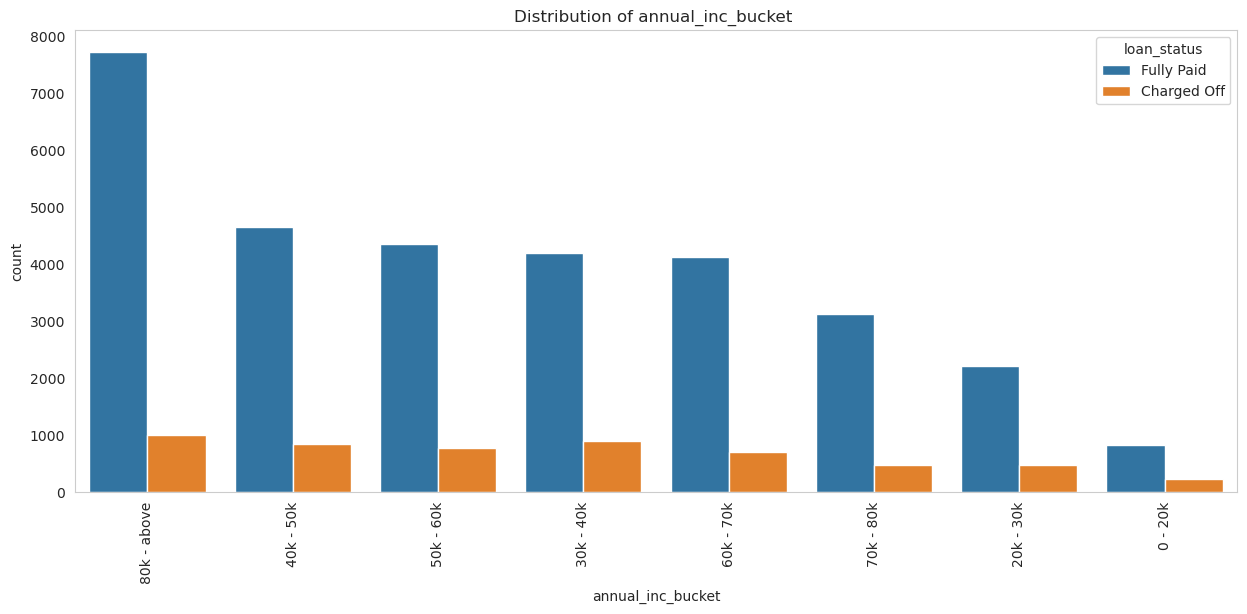

/tmp/ipykernel_798/66687772.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = loan[loan['loan_status'] == 'Charged Off'].groupby('annual_inc_bucket', dropna=False)['loan_status'].count().reset_index(name='Charged Off')
/tmp/ipykernel_798/66687772.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = loan.groupby('annual_inc_bucket', dropna=False)['loan_status'].count().reset_index(name='total count')
/tmp/ipykernel_798/66687772.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavio

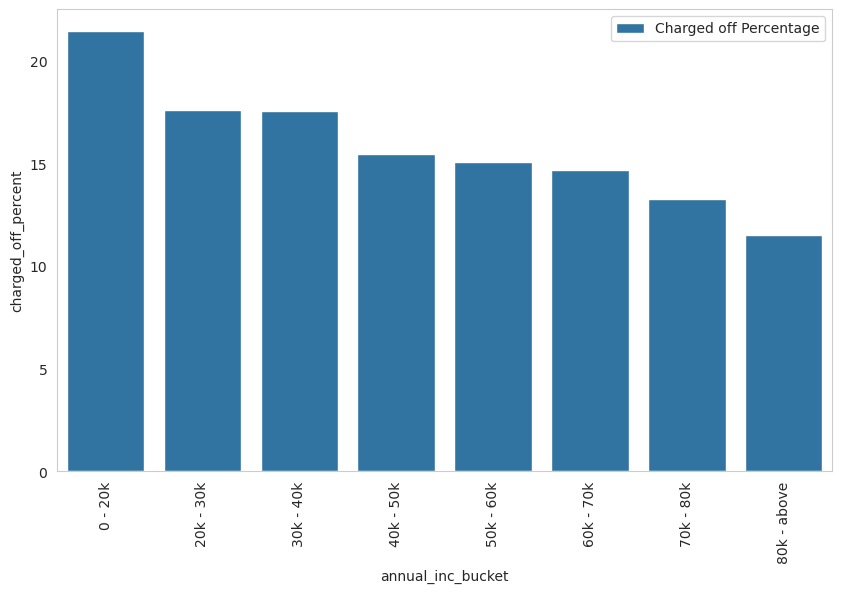

In [458]:
plt.figure(figsize=(15, 6))

purpose_order = (
    loan.groupby('annual_inc_bucket')['loan_status']
    .count()
    .sort_values(ascending=False)
    .index
)
ax = sns.countplot(x='annual_inc_bucket', hue='loan_status', data=loan, order=purpose_order)
plt.xlabel('annual_inc_bucket')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Distribution of annual_inc_bucket ',fontsize=12)
plt.show()


df1 = loan[loan['loan_status'] == 'Charged Off'].groupby('annual_inc_bucket', dropna=False)['loan_status'].count().reset_index(name='Charged Off')
df2 = loan.groupby('annual_inc_bucket', dropna=False)['loan_status'].count().reset_index(name='total count')
df3 = loan[loan['loan_status'] == 'Fully Paid'].groupby('annual_inc_bucket', dropna=False)['loan_status'].count().reset_index(name='Fully Paid')

result_temp = pd.merge(df1, df2, on='annual_inc_bucket')
result_df = pd.merge(result_temp, df3, on='annual_inc_bucket')

result_df['charged_off_percent'] = (result_df['Charged Off'] / result_df['total count']) * 100
result_df['fully_paid_percent'] = (result_df['Fully Paid'] / result_df['total count']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=result_df['annual_inc_bucket'], y=result_df['charged_off_percent'], label='Charged off Percentage')
plt.xticks(rotation=90)
plt.show()


/tmp/ipykernel_798/2726978065.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan.groupby('int_rate_bucket')['loan_status']


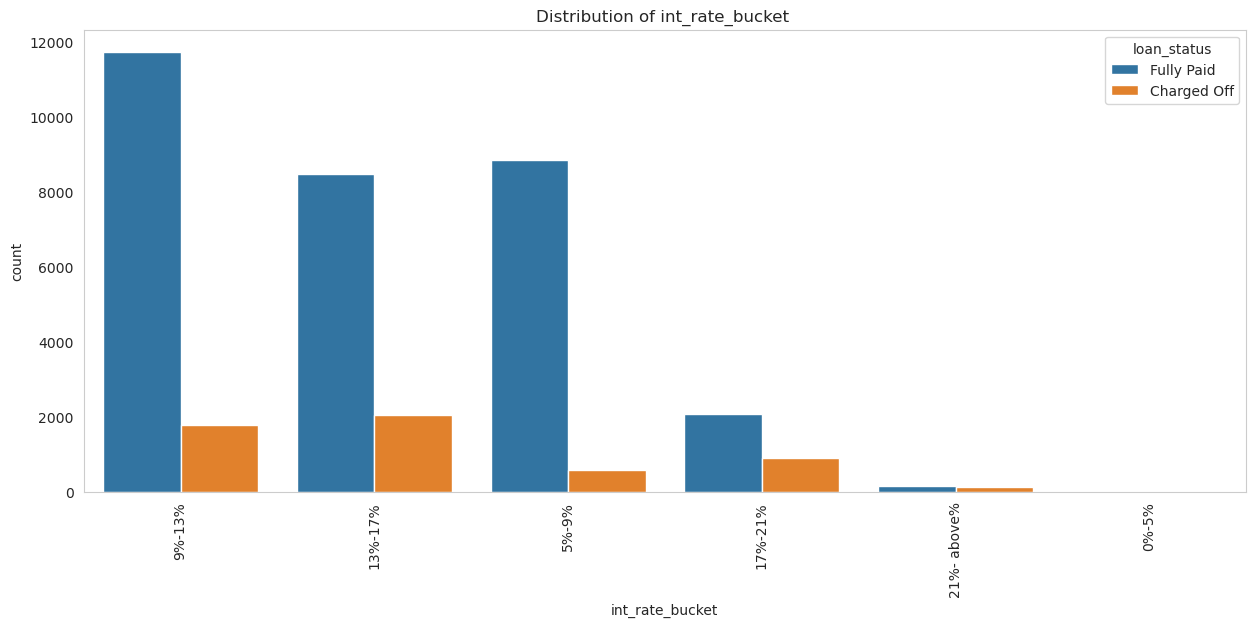

/tmp/ipykernel_798/2726978065.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = loan[loan['loan_status'] == 'Charged Off'].groupby('int_rate_bucket', dropna=False)['loan_status'].count().reset_index(name='Charged Off')
/tmp/ipykernel_798/2726978065.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = loan.groupby('int_rate_bucket', dropna=False)['loan_status'].count().reset_index(name='total count')
/tmp/ipykernel_798/2726978065.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behav

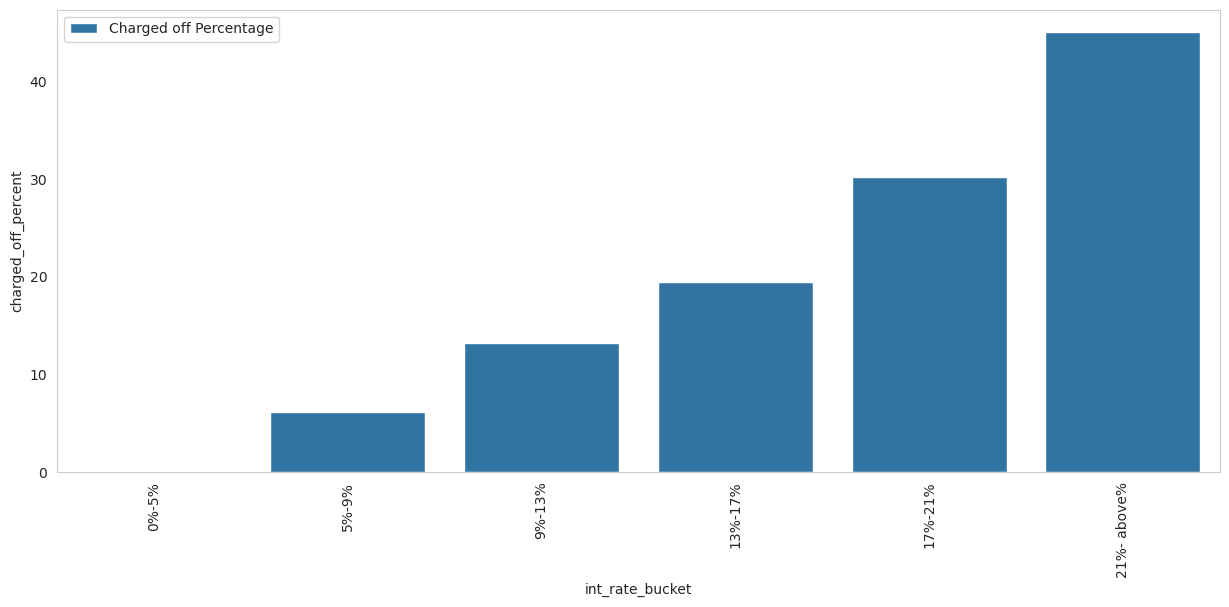

In [461]:
plt.figure(figsize=(15, 6))

purpose_order = (
    loan.groupby('int_rate_bucket')['loan_status']
    .count()
    .sort_values(ascending=False)
    .index
)
ax = sns.countplot(x='int_rate_bucket', hue='loan_status', data=loan, order=purpose_order)
plt.xlabel('int_rate_bucket')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Distribution of int_rate_bucket ',fontsize=12)
plt.show()


df1 = loan[loan['loan_status'] == 'Charged Off'].groupby('int_rate_bucket', dropna=False)['loan_status'].count().reset_index(name='Charged Off')
df2 = loan.groupby('int_rate_bucket', dropna=False)['loan_status'].count().reset_index(name='total count')
df3 = loan[loan['loan_status'] == 'Fully Paid'].groupby('int_rate_bucket', dropna=False)['loan_status'].count().reset_index(name='Fully Paid')

result_temp = pd.merge(df1, df2, on='int_rate_bucket')
result_df = pd.merge(result_temp, df3, on='int_rate_bucket')

result_df['charged_off_percent'] = (result_df['Charged Off'] / result_df['total count']) * 100
result_df['fully_paid_percent'] = (result_df['Fully Paid'] / result_df['total count']) * 100

plt.figure(figsize=(15, 6))
sns.barplot(x=result_df['int_rate_bucket'], y=result_df['charged_off_percent'], label='Charged off Percentage')
plt.xticks(rotation=90)
plt.show()


/tmp/ipykernel_798/2662278654.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan.groupby('dti_bucket')['loan_status']


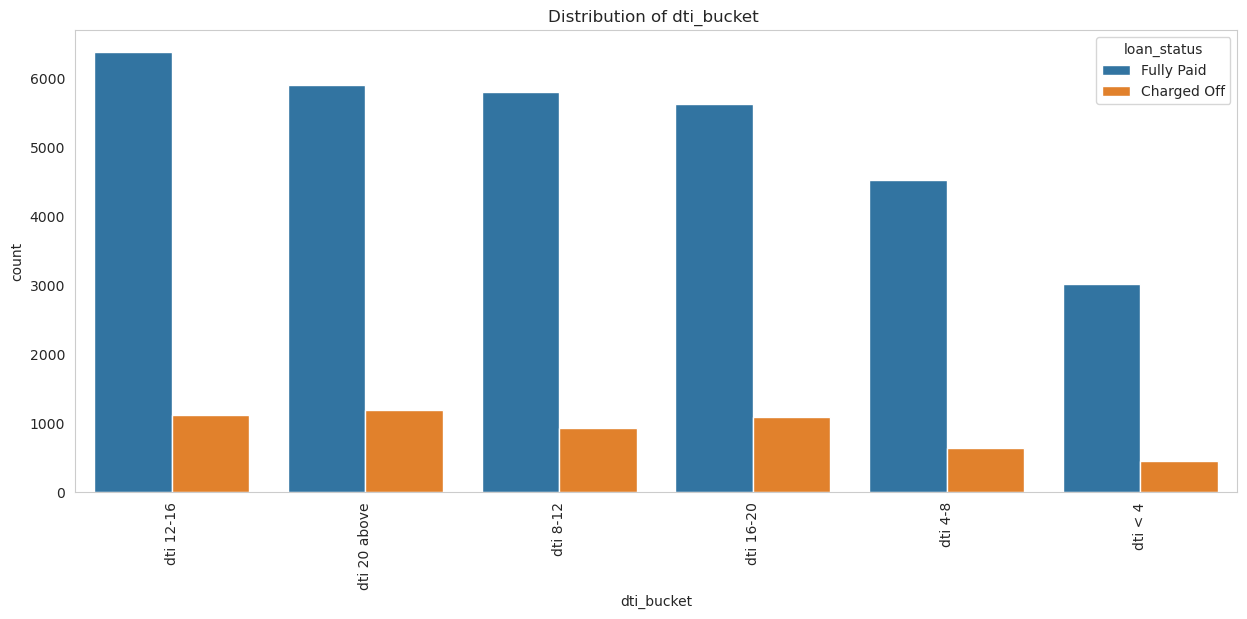

/tmp/ipykernel_798/2662278654.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = loan[loan['loan_status'] == 'Charged Off'].groupby('dti_bucket', dropna=False)['loan_status'].count().reset_index(name='Charged Off')
/tmp/ipykernel_798/2662278654.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = loan.groupby('dti_bucket', dropna=False)['loan_status'].count().reset_index(name='total count')
/tmp/ipykernel_798/2662278654.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obs

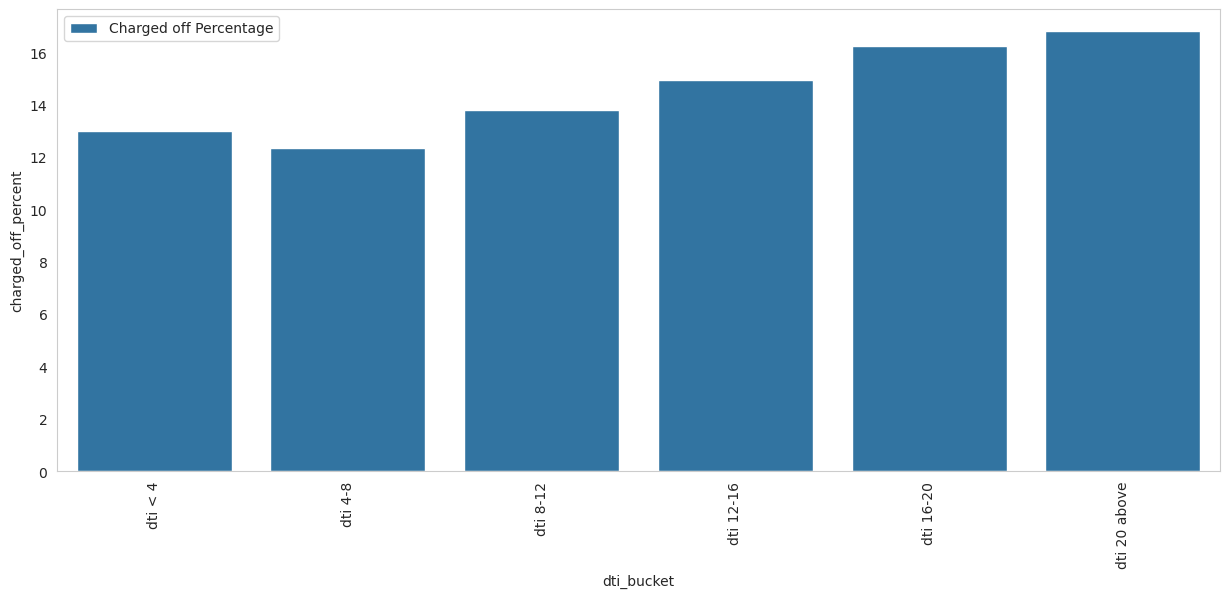

In [464]:
plt.figure(figsize=(15, 6))

purpose_order = (
    loan.groupby('dti_bucket')['loan_status']
    .count()
    .sort_values(ascending=False)
    .index
)
ax = sns.countplot(x='dti_bucket', hue='loan_status', data=loan, order=purpose_order)
plt.xlabel('dti_bucket')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Distribution of dti_bucket ',fontsize=12)
plt.show()


df1 = loan[loan['loan_status'] == 'Charged Off'].groupby('dti_bucket', dropna=False)['loan_status'].count().reset_index(name='Charged Off')
df2 = loan.groupby('dti_bucket', dropna=False)['loan_status'].count().reset_index(name='total count')
df3 = loan[loan['loan_status'] == 'Fully Paid'].groupby('dti_bucket', dropna=False)['loan_status'].count().reset_index(name='Fully Paid')

result_temp = pd.merge(df1, df2, on='dti_bucket')
result_df = pd.merge(result_temp, df3, on='dti_bucket')

result_df['charged_off_percent'] = (result_df['Charged Off'] / result_df['total count']) * 100
result_df['fully_paid_percent'] = (result_df['Fully Paid'] / result_df['total count']) * 100

plt.figure(figsize=(15, 6))
sns.barplot(x=result_df['dti_bucket'], y=result_df['charged_off_percent'], label='Charged off Percentage')
plt.xticks(rotation=90)
plt.show()
